<a href="https://colab.research.google.com/github/sindhuja279/ML_Lab/blob/main/1BM22CS279_LAB8_ADABOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Default Accuracy (10 estimators): 0.8182
Confusion Matrix:
[[6782  632]
 [1144 1211]]

Best Accuracy: 0.8340 using 73 estimators
Best Confusion Matrix:
[[7015  399]
 [1223 1132]]


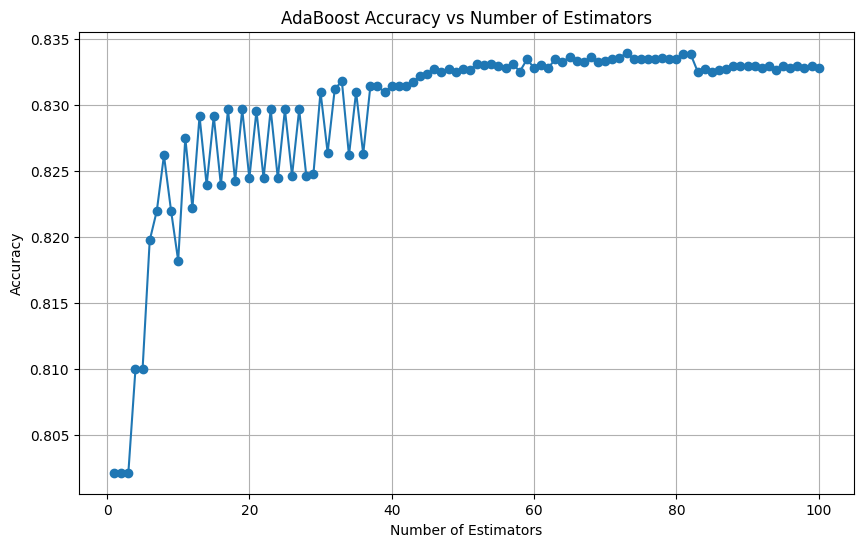

In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/income (1).csv")

# Encode categorical variables (if any)
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split dataset into features and target
X = df.drop("income_level", axis=1)  # replace 'income' with the actual target column name if different
y = df["income_level"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost with default n_estimators=10
ada_default = AdaBoostClassifier(n_estimators=10, random_state=42)
ada_default.fit(X_train, y_train)
y_pred_default = ada_default.predict(X_test)
default_accuracy = accuracy_score(y_test, y_pred_default)

print(f"Default Accuracy (10 estimators): {default_accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_default))

# Tune number of estimators
scores = []
n_estimators_range = range(1, 101)

for n in n_estimators_range:
    ada = AdaBoostClassifier(n_estimators=n, random_state=42)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)

# Best accuracy and corresponding n_estimators
best_score = max(scores)
best_n_estimators = n_estimators_range[scores.index(best_score)]

# Final model with best n_estimators
ada_best = AdaBoostClassifier(n_estimators=best_n_estimators, random_state=42)
ada_best.fit(X_train, y_train)
y_pred_best = ada_best.predict(X_test)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

print(f"\nBest Accuracy: {best_score:.4f} using {best_n_estimators} estimators")
print("Best Confusion Matrix:")
print(conf_matrix_best)

# Optional: Plot accuracy vs number of estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, scores, marker='o')
plt.title("AdaBoost Accuracy vs Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()